In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('banknotes.csv')

In [6]:
pwd

'C:\\Users\\mihik'

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df.shape

(1372, 5)

#### Seperate i/p and o/p data

In [9]:
x = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']

#### Explore Data

<Axes: xlabel='Class', ylabel='count'>

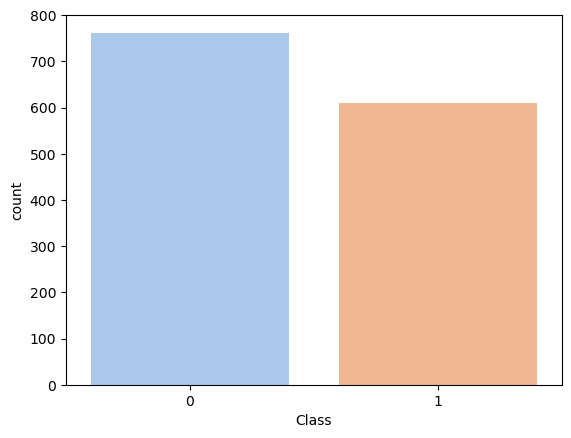

In [10]:
sns.countplot(x = y, palette="pastel")

In [11]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

C:\Users\mihik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


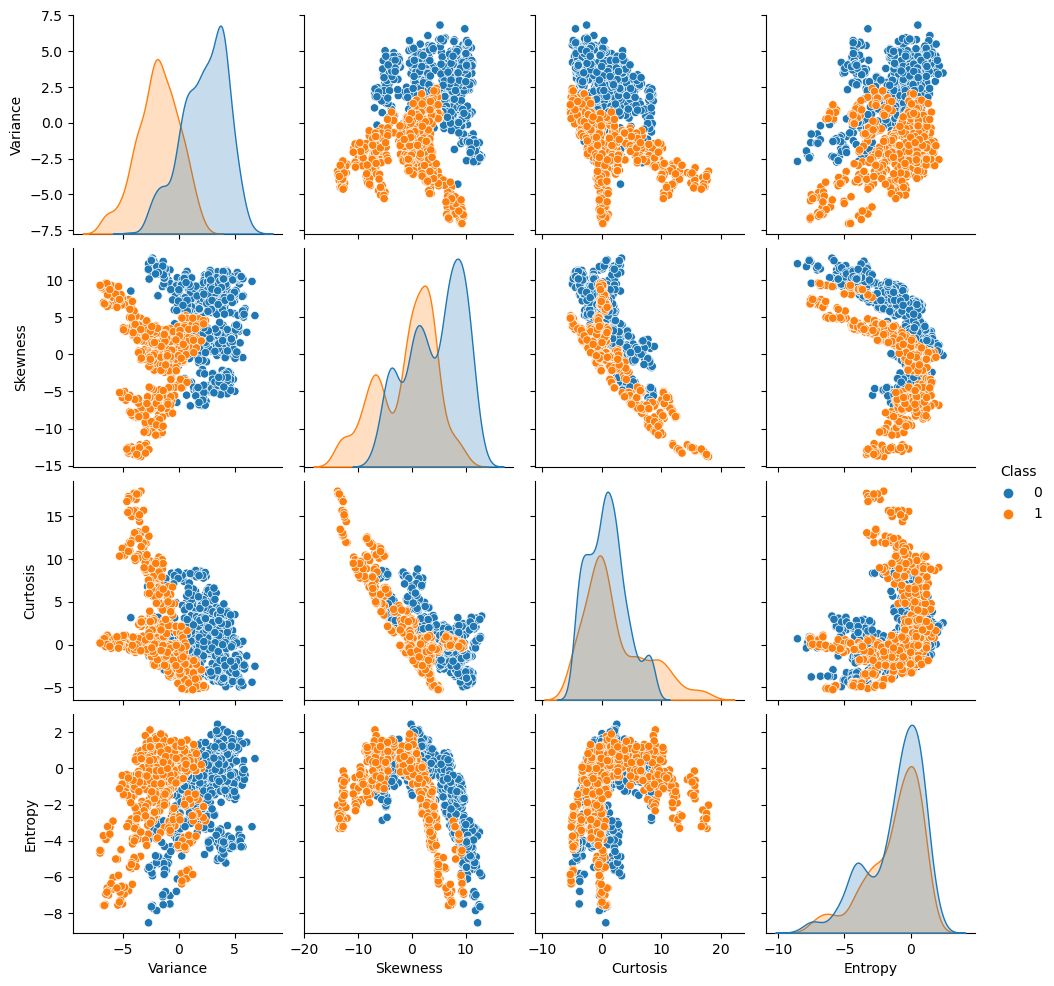

In [12]:
sns.pairplot(df, hue='Class')

#### Cross Validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, stratify = y) 
# Stratify maintains the proportion of class in data avoids poor fitting and poor generalization

In [15]:
x_train.shape

(1029, 4)

In [16]:
x_test.shape

(343, 4)

In [17]:
y.value_counts(0) / len(y) * 100

Class
0    55.539359
1    44.460641
Name: count, dtype: float64

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
classifier = DecisionTreeClassifier(random_state = 0)

In [20]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.5048449612403101, 0.9444444444444444, 'Variance <= 0.27\ngini = 0.49\nsamples = 1029\nvalue = [571, 458]\nclass = O'),
 Text(0.3333333333333333, 0.8333333333333334, 'Skewness <= 7.57\ngini = 0.3\nsamples = 478\nvalue = [86, 392]\nclass = F'),
 Text(0.23255813953488372, 0.7222222222222222, 'Variance <= -0.46\ngini = 0.12\nsamples = 402\nvalue = [25, 377]\nclass = F'),
 Text(0.12403100775193798, 0.6111111111111112, 'Curtosis <= 6.22\ngini = 0.07\nsamples = 347\nvalue = [12, 335]\nclass = F'),
 Text(0.06201550387596899, 0.5, 'Skewness <= 7.29\ngini = 0.01\nsamples = 234\nvalue = [1, 233]\nclass = F'),
 Text(0.031007751937984496, 0.3888888888888889, 'gini = 0.0\nsamples = 230\nvalue = [0, 230]\nclass = F'),
 Text(0.09302325581395349, 0.3888888888888889, 'Entropy <= -4.11\ngini = 0.38\nsamples = 4\nvalue = [1, 3]\nclass = F'),
 Text(0.06201550387596899, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = F'),
 Text(0.12403100775193798, 0.2777777777777778, 'gini = 0

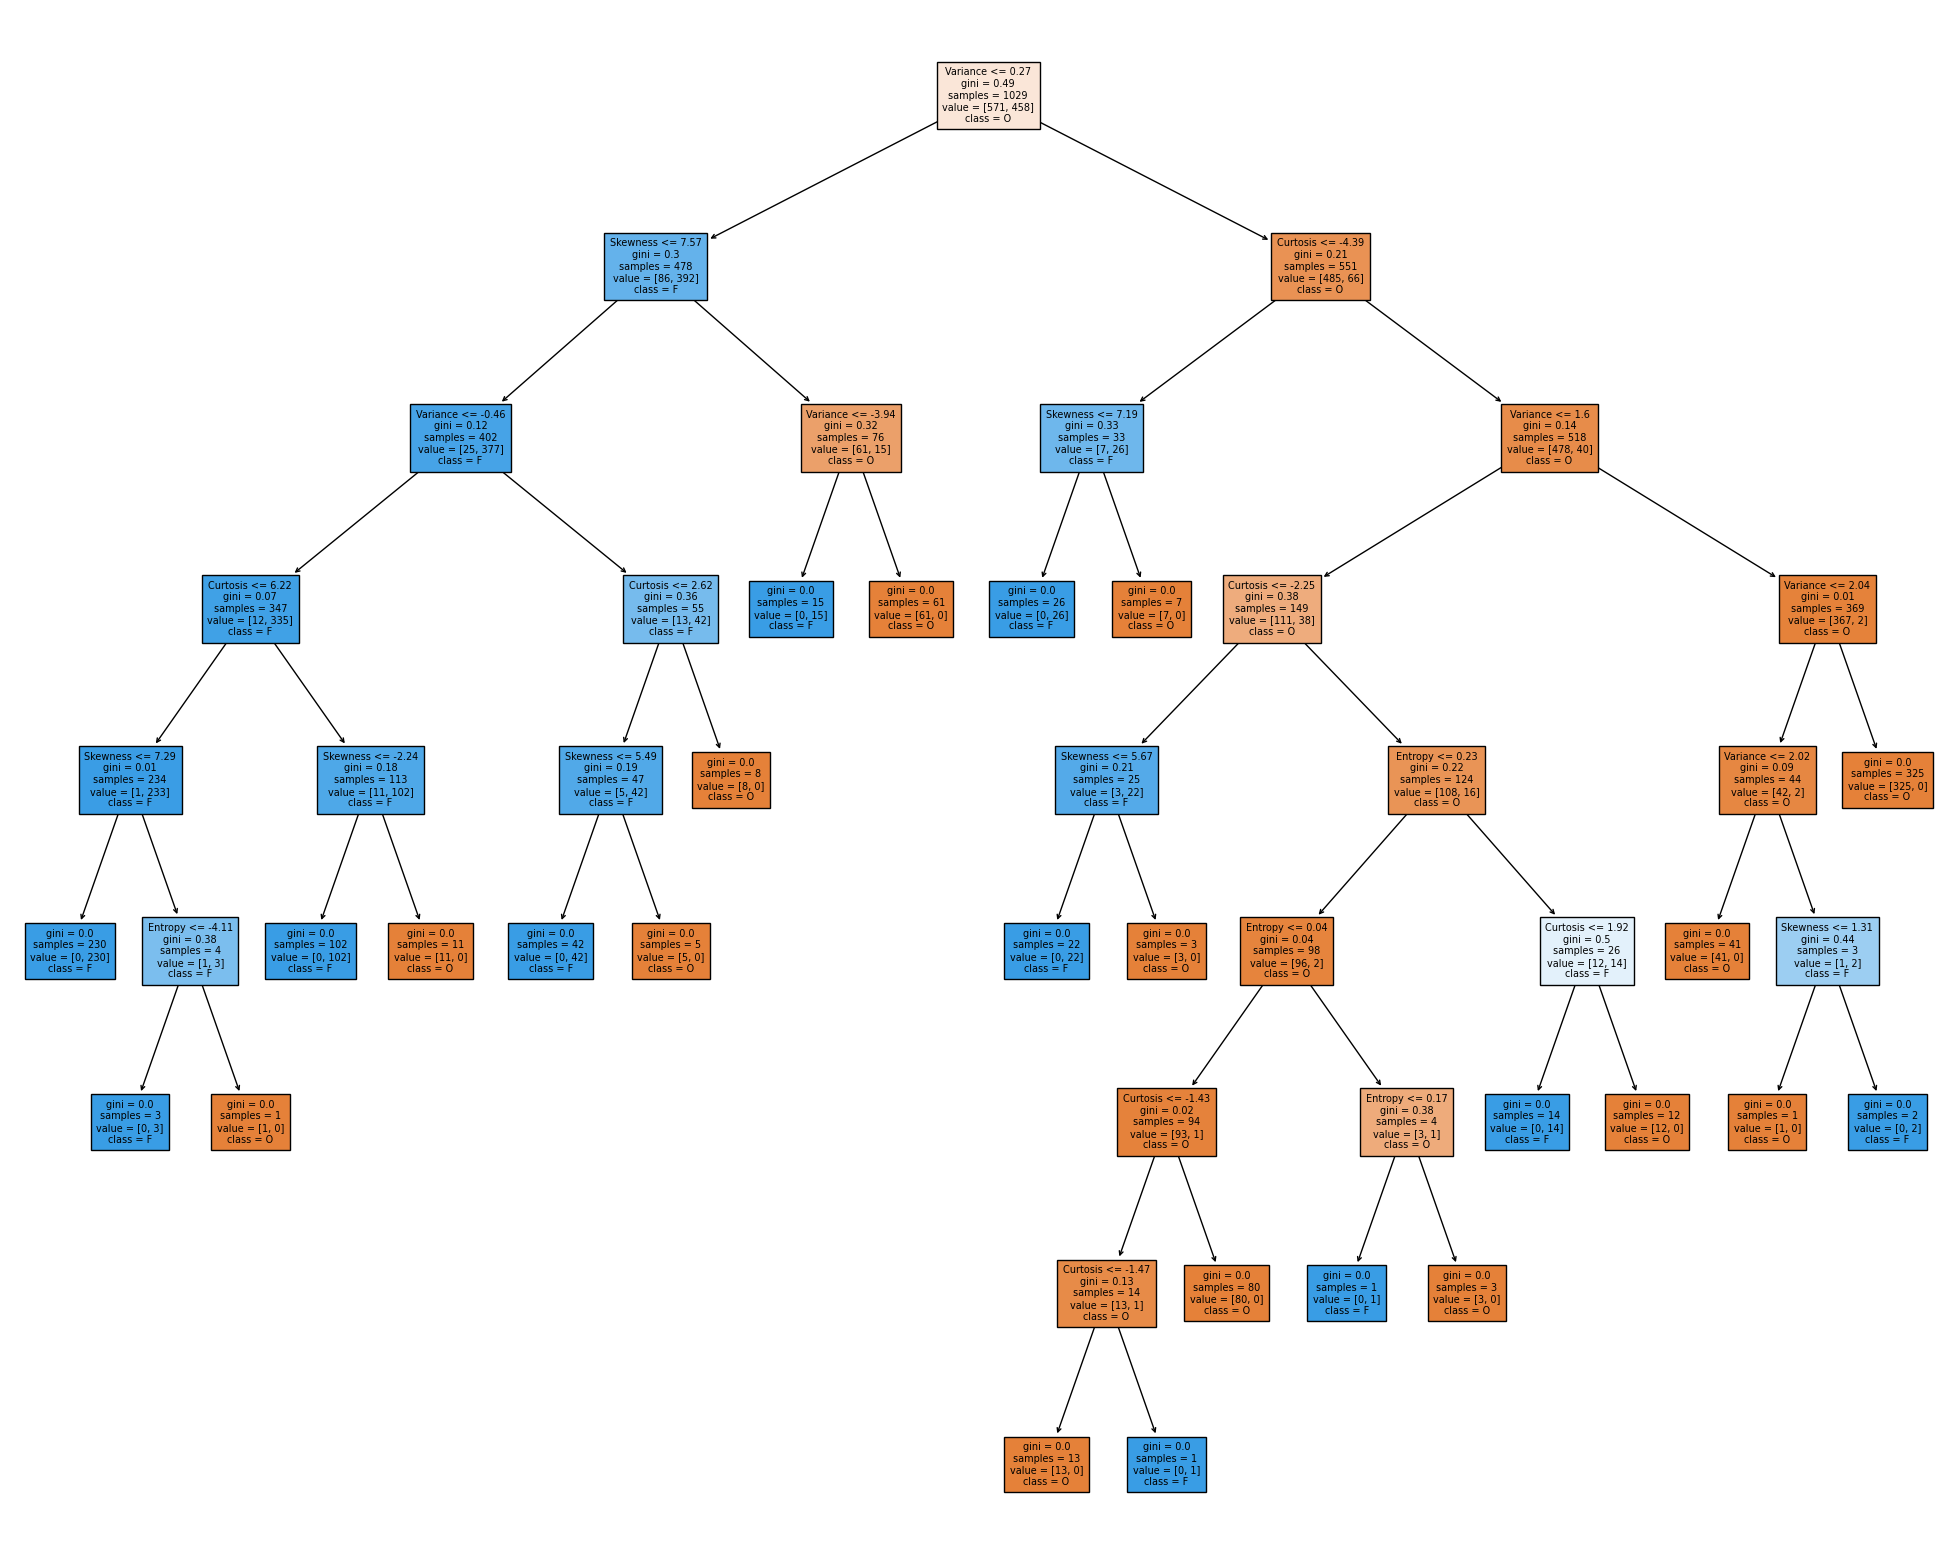

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 20))
plot_tree(classifier, fontsize=7, filled=True, class_names=['O', 'F'], feature_names=x.columns.tolist(), precision=2)

#### Performance Evaluation

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

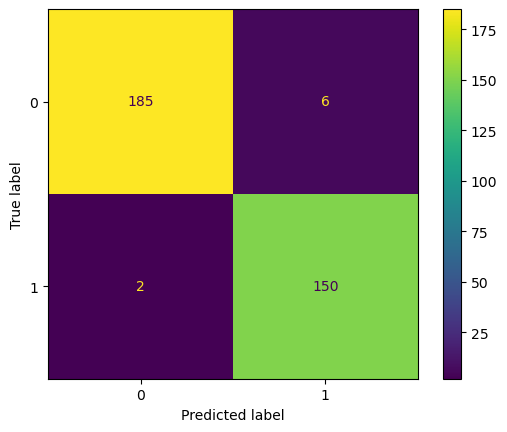

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [25]:
accuracy_score(y_test, y_pred)

0.9766763848396501

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       191
           1       0.96      0.99      0.97       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [27]:
imp = classifier.feature_importances_

<BarContainer object of 4 artists>

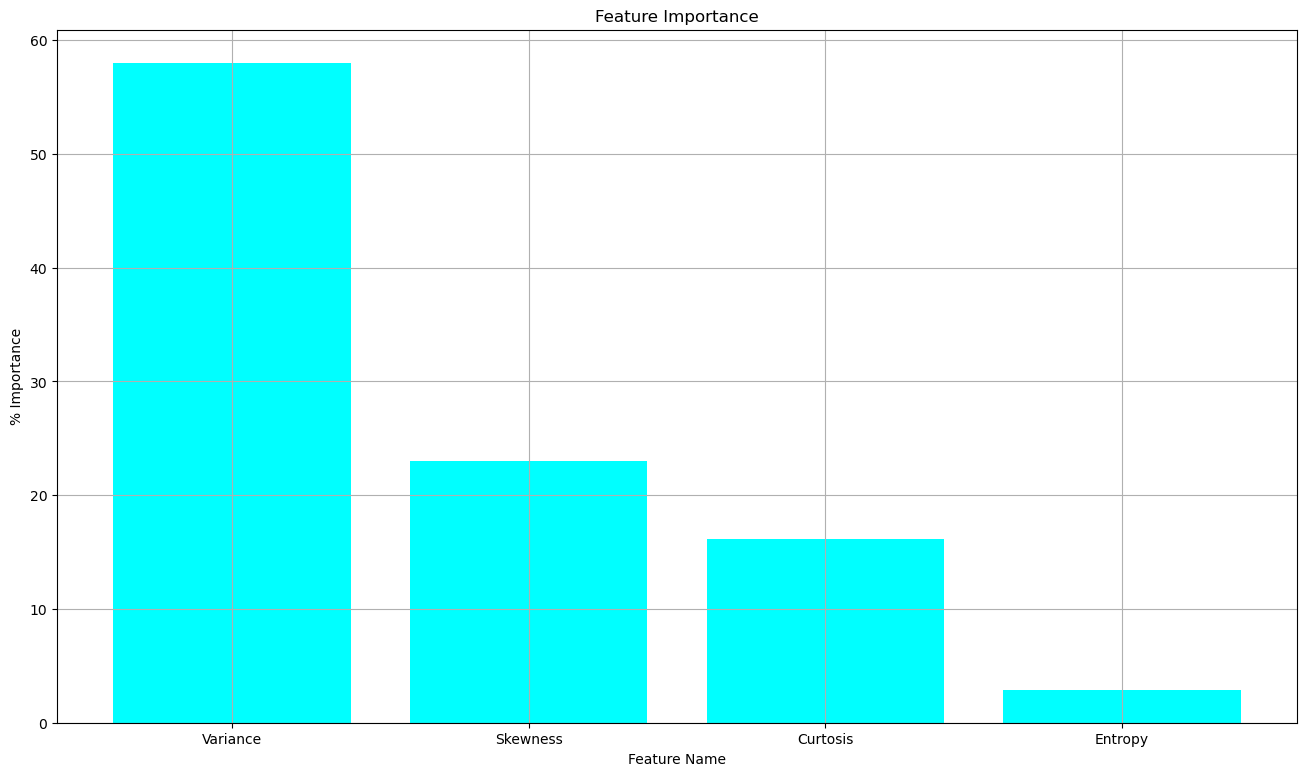

In [28]:
plt.figure(figsize=(16,9))
plt.grid()
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('% Importance')
plt.bar(x.columns, imp * 100, color = 'cyan')

In [29]:
new = pd.DataFrame({'Variance':[3.86600, -3.75030, 0.32924], 'Skewness':[-2.63830, -13.45860, -4.45520], 'Curtosis':[1.9242, 17.5932, 4.5718], 'Entropy':[0.10645, -2.77710, -0.98880]})
new

,Variance,Skewness,Curtosis,Entropy
0,3.86600,-2.6383,1.9242,0.10645
1,-3.75030,-13.4586,17.5932,-2.77710
2,0.32924,-4.4552,4.5718,-0.98880


In [30]:
classifier.predict(new)

array([0, 1, 0], dtype=int64)

# ARTIFICIAL  NEURAL NETWORK

In [31]:
from sklearn.neural_network import MLPClassifier

In [33]:
ann=MLPClassifier(hidden_layer_sizes=(5,5,5), random_state=0, max_iter=100)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
ann.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=100, random_state=0)

# PERFORMANCE EVALUATION

In [38]:
y_pred = ann.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

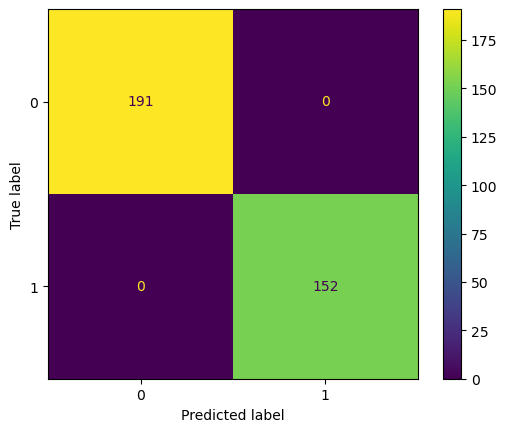

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [40]:
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [41]:
new = pd.DataFrame({'Variance':[3.86600, -3.75030, 0.32924], 'Skewness':[-2.63830, -13.45860, -4.45520], 'Curtosis':[1.9242, 17.5932, 4.5718], 'Entropy':[0.10645, -2.77710, -0.98880]})
new

,Variance,Skewness,Curtosis,Entropy
0,3.86600,-2.6383,1.9242,0.10645
1,-3.75030,-13.4586,17.5932,-2.77710
2,0.32924,-4.4552,4.5718,-0.98880


In [42]:
ann.predict(new)

array([0, 1, 0], dtype=int64)